In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
import prepare 

from pydataset import data

## In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')

- print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

- print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

- print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


- print the summary statistics for each of the numeric variables

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Read the data from this google sheet into a dataframe, df_google.

In [8]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

titanic = pd.read_csv(csv_export_url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- print the first 3 rows

In [12]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


-  print the number of rows and columns

In [13]:
titanic.shape

(891, 12)

- print the column names

In [14]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- print the summary statistics for each of the numeric variables

In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- print the unique values for each of your categorical variables

In [19]:
titanic.Embarked.value_counts(dropna= False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [20]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

titanic = pd.read_xlsx(xlsx_export_url)
titanic

AttributeError: module 'pandas' has no attribute 'read_xlsx'

- assign the first 100 rows to a new dataframe, df_excel_sample

- print the number of rows of your original dataframe

- print the first 5 column names

- print the column names that have a data type of object

- compute the range for each of the numeric variables.

## Make a new python module, acquire.py to hold the following data aquisition functions:

- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [21]:
query = '''
SELECT * from passengers;
'''
url = acquire.get_connection('titanic_db')

df = pd.read_sql(query, url)

In [22]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [23]:
query = '''
SELECT species_id, species_name from species;
'''
url = acquire.get_connection('iris_db')

df = pd.read_sql(query, url)

- Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [24]:
def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('telco_churn'))
    
    return df


     

In [25]:
def get_telco_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

query = '''
SELECT contract_type, internet_service_type, payment_type FROM customer_payments
JOIN payment_types USING(payment_type_id)
JOIN customer_contracts USING(customer_id)
JOIN contract_types USING(contract_type_id)
JOIN customer_subscriptions USING(customer_id)
JOIN internet_service_types USING(internet_service_type_id);

'''
url = get_connection('telco_churn')

df = pd.read_sql(query, url)
df.head(51)

- Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

---

# Using the Iris Data:

## Prepare: What to do?
- Make sure any column names are cleaned and legible
- Make sure any missing values are accounted for
- Make sure any data types in our set are correct
- Encode our categorical variables
- Make it repeatable

- Use the function defined in acquire.py to load the iris data.

In [26]:
iris = acquire.get_iris_data()
iris

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


- Drop the species_id and measurement_id columns.

In [27]:
column_drops = ['species_id']
iris.drop(columns= column_drops, inplace= True) 

- Rename the species_name column to just species.

In [28]:
iris = iris.rename(columns = {'species_name': 'species'})
iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [29]:
dummy_df = pd.get_dummies(iris.species, drop_first=True)
dummy_df

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [30]:
iris = pd.concat([iris, dummy_df], axis = 1)

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [31]:
def prep_iris(iris):
    column_drops = ['species_id']
    iris.drop(columns= column_drops, inplace= True) 
    
    iris = iris.rename(columns = {'species_name': 'species'})
    
    dummy_df = pd.get_dummies(iris.species, drop_first=True)
    iris = pd.concat([iris, dummy_df], axis = 1)
    return iris

In [32]:
prep_iris(acquire.get_iris_data())

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


## Using the Titanic dataset

- Use the function defined in acquire.py to load the Titanic data.

In [33]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


- Drop any unnecessary, unhelpful, or duplicated columns.

In [34]:
titanic.info()
# 'deck' as a lot of missing values
# 'sex' and 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [35]:
column_drops = ['embarked', 'class', 'passenger_id', 'deck']
titanic.drop(columns= column_drops, inplace= True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [36]:

dummy = pd.get_dummies(titanic[['embark_town', 'sex']], drop_first= True)

In [37]:
titanic = pd.concat([titanic, dummy], axis=1)

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [38]:
def prep_titanic(titanic):
    titanic = titanic.drop(columns=['class', 'embarked', 'passenger_id','deck', 'age'])
    titanic = titanic.dropna()
    encoded_vars = pd.get_dummies(titanic[['embark_town', 'sex']], drop_first=True)
    titanic = pd.concat([titanic, encoded_vars], axis=1)
    return titanic

# # Using the Telco dataset

- Use the function defined in acquire.py to load the Telco data.

In [39]:
telco = acquire.get_telco_data()
telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [40]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [41]:
column_drops = ['payment_type_id', 'internet_service_type_id', 'contract_type_id',]
telco.drop(columns= column_drops, inplace= True)
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [42]:
telco.total_charges.value_counts()
# blank value can be because its the people who just started their membership and have not paid yet

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [43]:
float('' + '0')

0.0

In [44]:
telco['total_charges']= (telco.total_charges + '0').astype('float')

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [45]:
telco.total_charges.dtype == 'object'


False

In [46]:
pd.get_dummies(telco.gender)


,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,1,0
7039,0,1
7040,0,1
7041,0,1


In [47]:
# construct a loop
# if the dtype associated with the Series in telco is an Object (str)
# then we will append it into our categorical list of column names
# otherwise it will be assumed to be numerical
categorical_columns = []
bin_cats = []
mult_cats = []
numerical_columns = []
for col in telco.columns:
    if telco[col].dtype == 'object':
        categorical_columns.append(col)
        if telco[col].value_counts().size > 2:
            mult_cats.append(col)
        else:
            bin_cats.append(col)
    else:
        numerical_columns.append(col)


In [48]:
categorical_columns

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [49]:
bin_cats

['gender',
 'partner',
 'dependents',
 'phone_service',
 'paperless_billing',
 'churn']

In [50]:
mult_cats

['customer_id',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [51]:
numerical_columns


['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

In [52]:
mult_cats.remove('customer_id')


In [53]:
mult_cats

['multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [54]:
telco['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [55]:
# encode our binary columns
# we can do one of several options in this case
# i'm choosing to use .map()
telco['gender'] = telco['gender'].map({'Male': 0, 'Female': 1})
telco['partner'] = telco['partner'].map({'No': 0, 'Yes': 1})
telco['dependents'] = telco['dependents'].map({'No': 0, 'Yes': 1})
telco['phone_service'] = telco['phone_service'].map({'No': 0, 'Yes': 1})
telco['paperless_billing'] = telco['paperless_billing'].map({'No': 0, 'Yes': 1})


In [56]:
# pass all other non-binary categoricals into dummy columns
telco = pd.concat([
    telco,
    pd.get_dummies(telco[mult_cats])
], axis=1)


# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [57]:
def prep_telco(telco):
    telco['total_charges'] = (telco.total_charges + '0').astype('float')
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(telco[['multiple_lines', 
                              'online_security', 'online_backup', 
                              'device_protection', 'tech_support', 'streaming_tv', 
                              'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type']],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco
    

## Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [23]:
def split_data(df, target=''):

    train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1349,
                              stratify=df[target])
    train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=1349,
                             stratify=train[target])
    return train, val, test

- Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [59]:
iris = acquire.get_iris_data()

In [60]:
train, validate, test = split_data(iris, target='species_name')

In [62]:
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species_name)

In [63]:
train.shape, validate.shape, test.shape

((58, 6), (26, 6), (30, 6))

- Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [ ]:
titanic_train, titanic_val, titanic_test = split_data(
titanic, target='survived')


In [ ]:
titanic_train, titanic_val, titanic_test

- Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [ ]:
 telco_train, telco_val, telco_test = split_data(
telco, target='churn')


In [ ]:
telco_train.size, telco_val.size, telco_test.size

# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

In [2]:
iris = acquire.get_iris_data()
iris

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [3]:
prepare.prep_iris(iris)


,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


In [20]:
def train_validate_test_split(df, targe):
    train_validate, test = train_test_split(iris, train_size=.80, 
                                            random_state=123, 
                                            stratify=df[target])

    train, validate = train_test_split(train_validate, 
                                       train_size=.70, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test

In [5]:
train, validate, test = train_validate_test_split(iris)

train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

### Univariate Stats

In [10]:
[train[col].dtype != 'object' for col in train.columns]

[True, False, True, True, True, True]

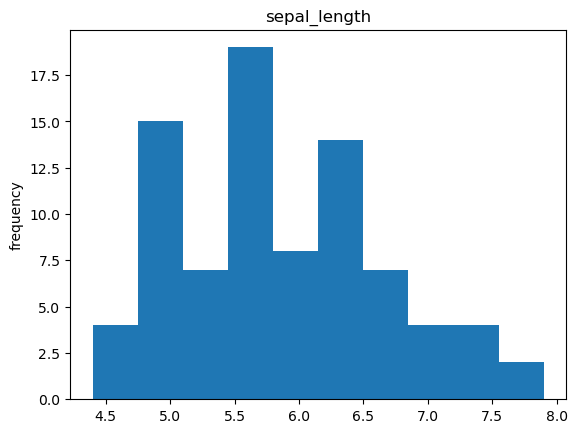

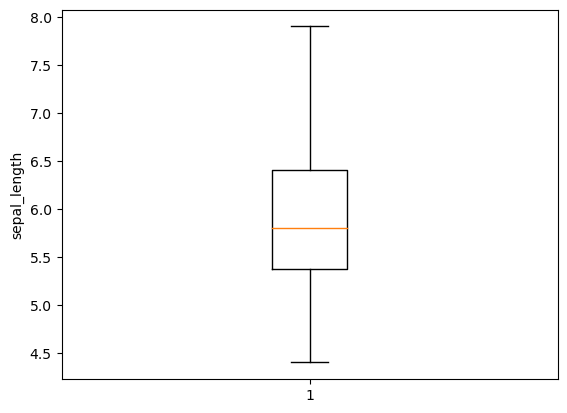

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [11]:
# identify numeric colummns
# then filter iris by those column 

num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
num_cols

# loop through each numeric column and plot a histogram and boxplot 
# and compute descriptive stats. 

# but before doing that, make it work for one variable to make sure it works for one

# histogram
col = 'sepal_length'
plt.hist(train[col])
plt.title(col)
plt.ylabel('frequency')
plt.show()

# boxplot
plt.boxplot(train[col])
plt.ylabel(col)
plt.show()

# descriptive statistics
train[col].describe()



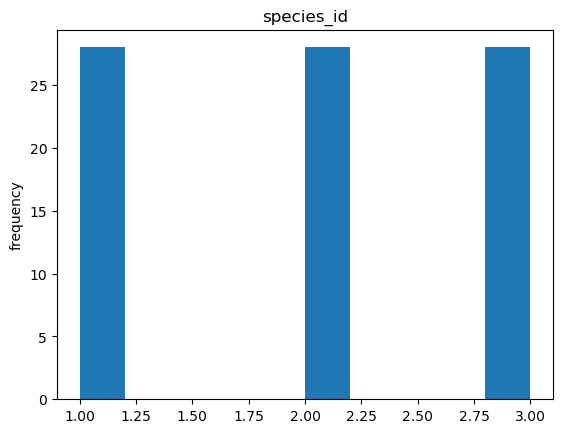

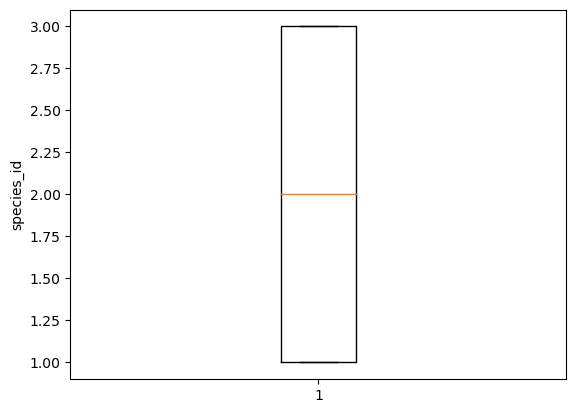

count    84.000000
mean      2.000000
std       0.821401
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: species_id, dtype: float64


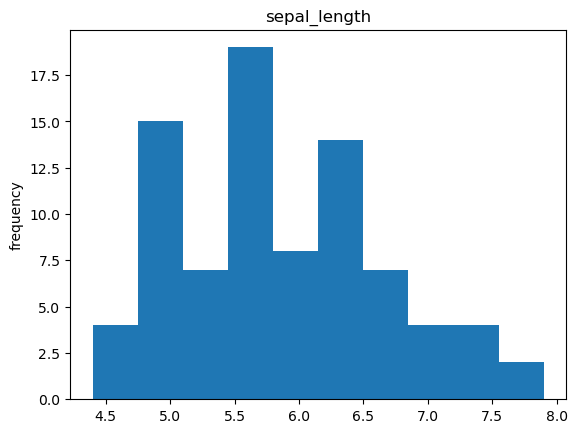

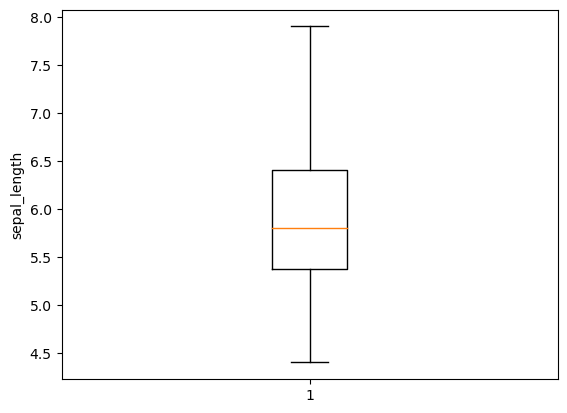

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


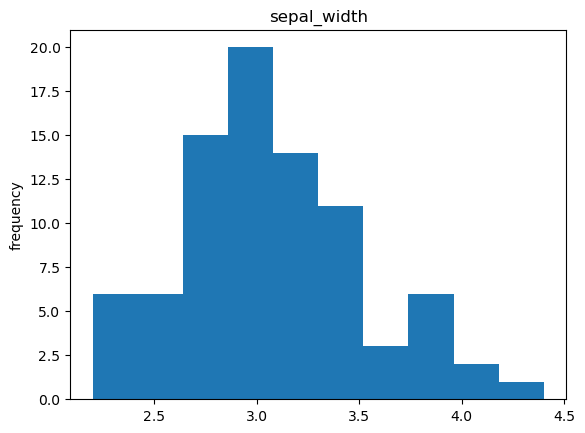

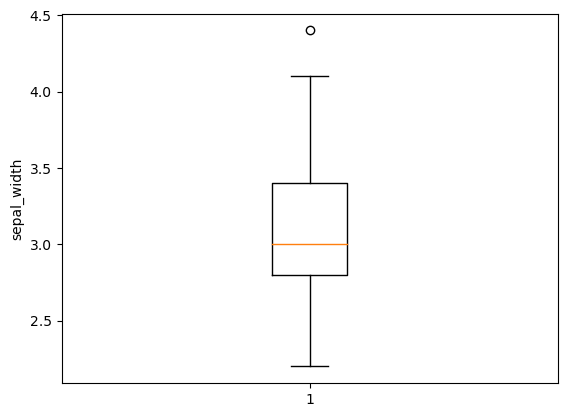

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


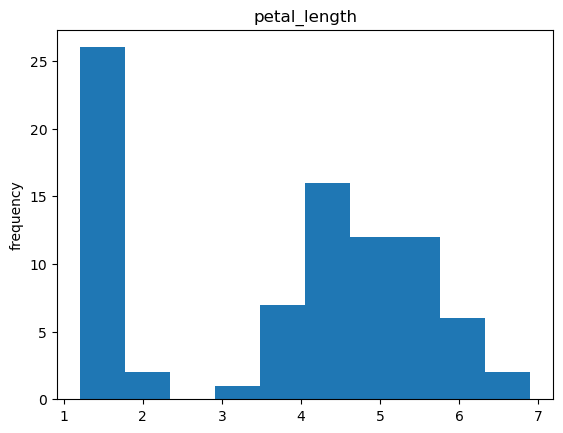

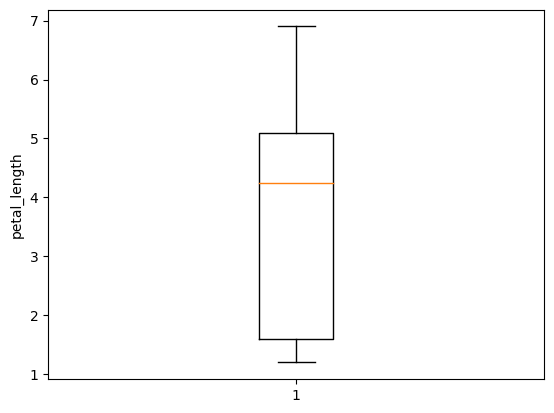

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


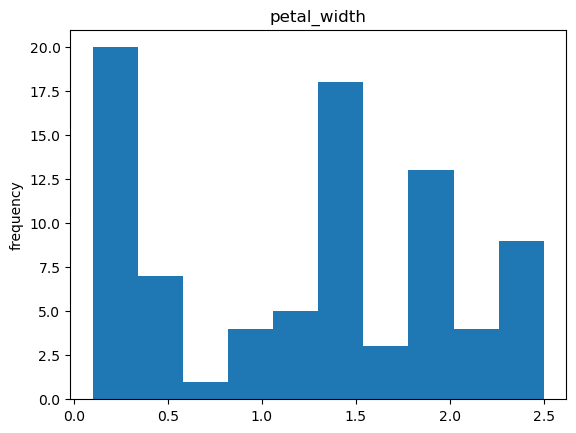

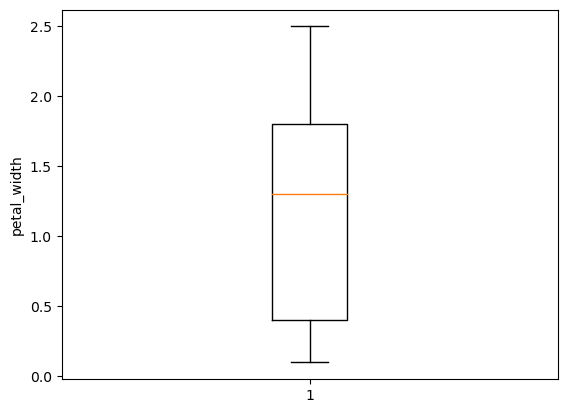

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [12]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()

    # boxplot
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()

    print(train[col].describe())

### Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.



In [ ]:
# now do that for each variable: barplot with species on x and var on y
col='sepal_length'
for col in num_cols:
    sns.barplot(x='species', y=col, data=train)
    plt.title(f'Average {col} for each species')
    overall_mean = train[col].mean()
    plt.axhline(overall_mean, label=f'Mean {col}', 
                color='rebeccapurple', linestyle='dotted')
    plt.legend()
    plt.show()
    
# compute the descriptive stats
train.groupby('species').describe().T

H_0: There is no significant difference in the mean petal width for Virginica vs Versicolor.

H_a: There is a significant difference in the mean petal width for Virginica vs. Versicolor.

In [19]:
alpha = 0.05

t, p = stats.mannwhitneyu(train[train.species_name=='virginica'].petal_width, 
                          train[train.species_name=='versicolor'].petal_width
                         )

if p < alpha:
    print("Reject null hypothesis, there is a significant difference")
    print("p-value: ", p)
else:
    print("There is not enough evidence to reject the null hypothesis")
    print("p-value: ", p)


Reject null hypothesis, there is a significant difference
p-value:  6.47119166980993e-10


## Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

H_0 = there is no significant differnce between the area for virginica compared to setosa
H_a = there is a significant differnce between the area for virginica compared to setosa

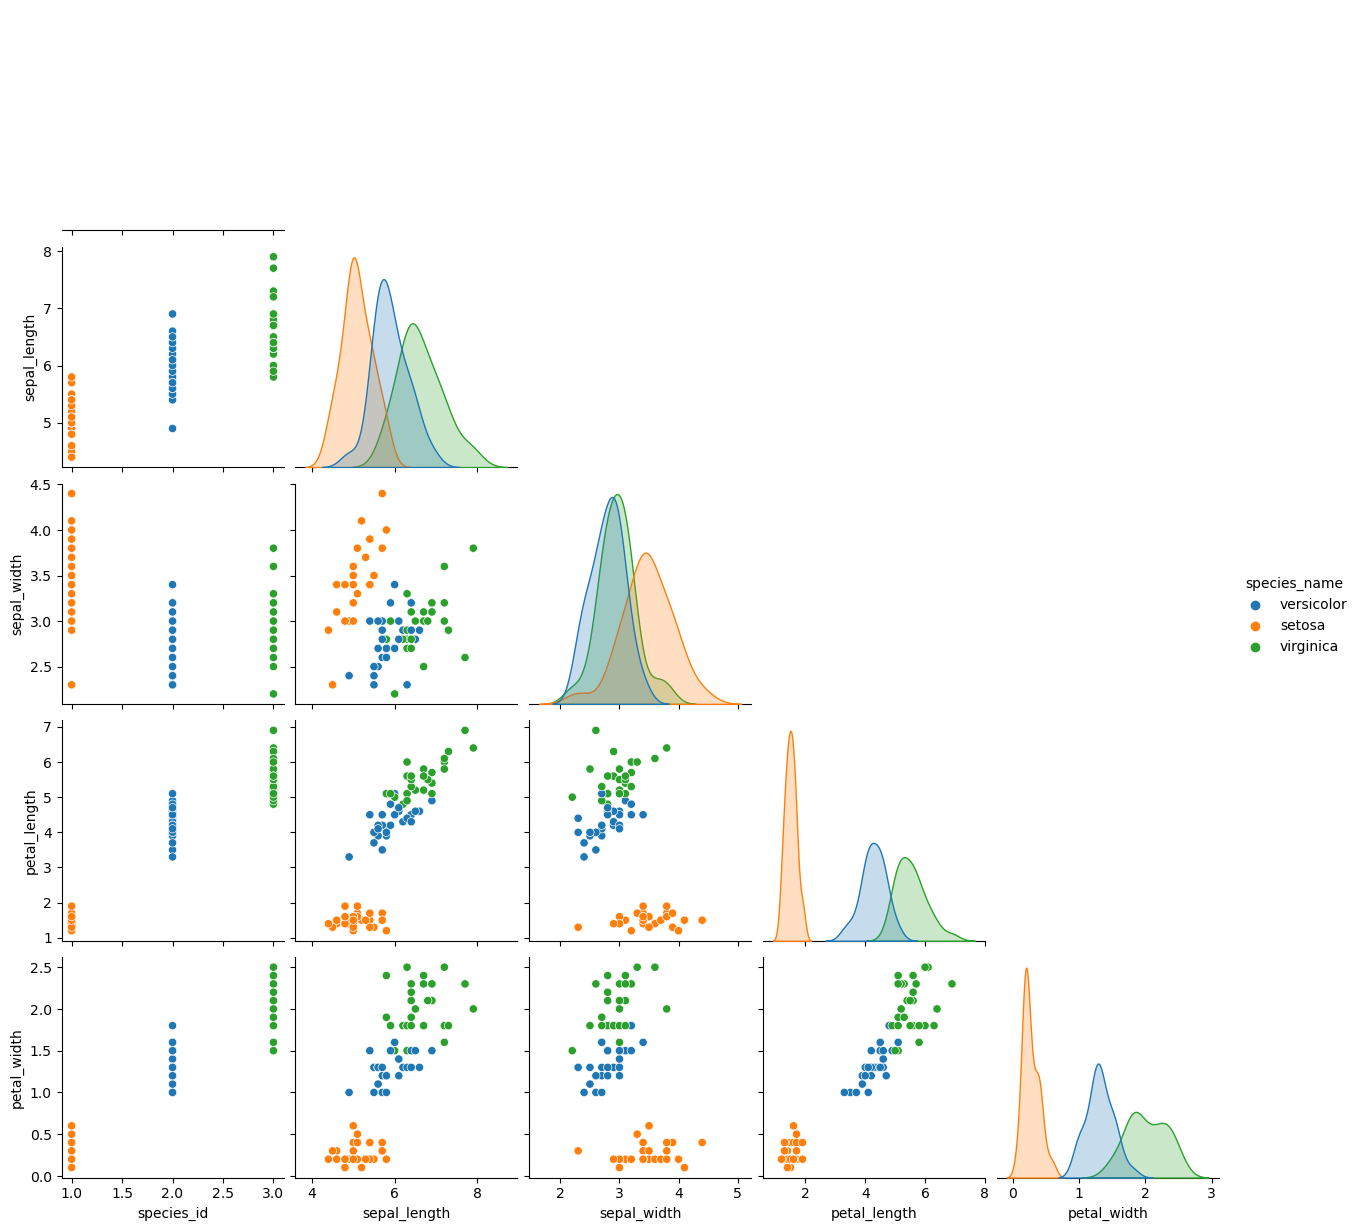

In [6]:
sns.pairplot(data = train, hue= 'species_name', corner= True)

In [8]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
#sns.relplot(x='sepal_area', y= 'petal_area')

In [14]:
melted = train.melt(id_vars=['species_name'], var_name='measure', value_name='values')

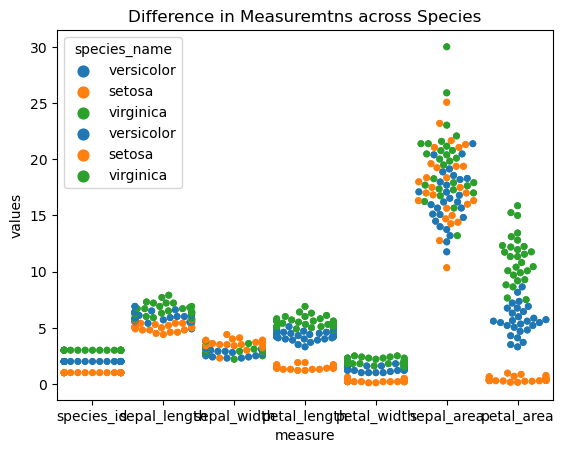

In [17]:
plt.title('Difference in Measuremtns across Species')
sns.swarmplot(x= 'measure', y= 'values', data = melted, hue= 'species_name')
plt.show()

- Document takeaways and any actions
    

# Part II

- Explore your titanic dataset more completely.

Is the impact of traveling alone differnent based on sex

In [36]:
titanic = acquire.get_titanic_data()

In [37]:
titanic = prepare.prep_titanic(titanic)

In [38]:
titanic

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,1,0,7.2500,Southampton,0,0,1,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,0,1,1
887,1,1,female,0,0,30.0000,Southampton,1,0,1,0
888,0,3,female,1,2,23.4500,Southampton,0,0,1,0
889,1,1,male,0,0,30.0000,Cherbourg,1,0,0,1


- Determine drivers of the target variable

In [39]:
train, validate, test = split_data(titanic, target='survived')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 474 to 336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 497 non-null    int64  
 1   pclass                   497 non-null    int64  
 2   sex                      497 non-null    object 
 3   sibsp                    497 non-null    int64  
 4   parch                    497 non-null    int64  
 5   fare                     497 non-null    float64
 6   embark_town              497 non-null    object 
 7   alone                    497 non-null    int64  
 8   embark_town_Queenstown   497 non-null    uint8  
 9   embark_town_Southampton  497 non-null    uint8  
 10  sex_male                 497 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 36.4+ KB


In [40]:
cat_vars= ['sex', 'embark_town', 'class', 'alone', 'parch']

In [41]:
col= 'pclass'

In [ ]:
survival_rate= train.survived.mean()
sns.barplot(x=col, y='survived', data = train)
plt.axhline(survival_rate, color='rebeccapurple', linestyle= '-.')
plt.show()

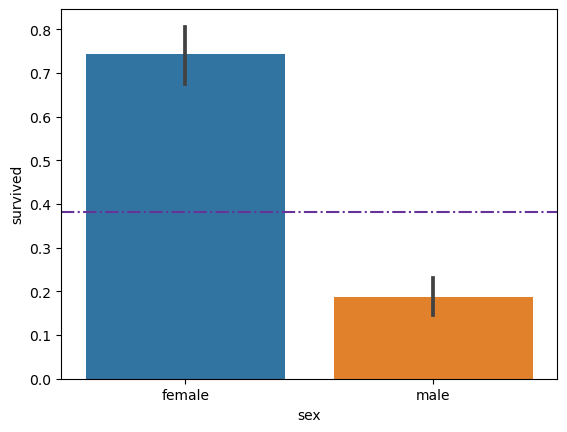

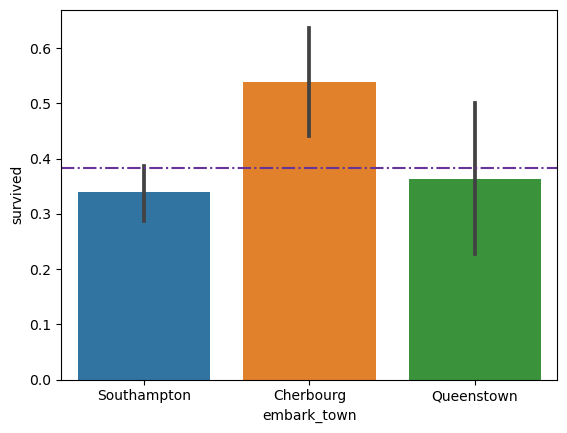

ValueError: Could not interpret input 'class'

In [49]:
# now to make it work for all of them

for col in cat_vars:
    plt.title= (f'Rate of survival')
                
    sns.barplot(x=col, y='survived', data = train)
    plt.axhline(survival_rate, color='rebeccapurple', linestyle= '-.')
    plt.show()

- Determine if certain columns should be dropped

No columns to drop

- Determine if it would be valuable to bin some numeric columns


In [103]:
titanic["Paid_survival"] = titanic['survived'].astype(str) +"-"+ titanic["fare"].astype(str)

0         0-7.25
1      1-71.2833
2        1-7.925
3         1-53.1
4         0-8.05
         ...    
886       0-13.0
887       1-30.0
888      0-23.45
889       1-30.0
890       0-7.75
Length: 891, dtype: object

In [125]:
pay_to_live.embark_town.value_counts()

Southampton    217
Cherbourg       93
Queenstown      30
Name: embark_town, dtype: int64

In [123]:
pay_to_live = titanic[titanic['Paid_survival'].str.startswith('1')]
pay_to_live

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,Paid_survival
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1-71.2833
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,1-7.925
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,1-53.1
8,8,1,3,female,27.0,0,2,11.1333,S,Third,NaN,Southampton,0,1-11.1333
9,9,1,2,female,14.0,1,0,30.0708,C,Second,NaN,Cherbourg,0,1-30.0708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,875,1,3,female,15.0,0,0,7.2250,C,Third,NaN,Cherbourg,1,1-7.225
879,879,1,1,female,56.0,0,1,83.1583,C,First,C,Cherbourg,0,1-83.1583
880,880,1,2,female,25.0,0,1,26.0000,S,Second,NaN,Southampton,0,1-26.0
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,1-30.0


In [120]:
pay_to_live.fare.mean()

48.39540760233917

In [127]:
pay_to_lose.embark_town.value_counts()

Southampton    427
Cherbourg       75
Queenstown      47
Name: embark_town, dtype: int64

In [124]:
pay_to_lose = titanic[titanic['Paid_survival'].str.startswith('0')]
pay_to_lose

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,Paid_survival
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0-7.25
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0-8.05
5,5,0,3,male,NaN,0,0,8.4583,Q,Third,NaN,Queenstown,1,0-8.4583
6,6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,1,0-51.8625
7,7,0,3,male,2.0,3,1,21.0750,S,Third,NaN,Southampton,0,0-21.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,884,0,3,male,25.0,0,0,7.0500,S,Third,NaN,Southampton,1,0-7.05
885,885,0,3,female,39.0,0,5,29.1250,Q,Third,NaN,Queenstown,0,0-29.125
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0-13.0
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0-23.45


In [122]:
pay_to_lose.fare.mean()

22.117886885245877

- Determine if it would be valuable to combine multiple columns into one.

- Does it make sense to combine any features?

No

- Do you find any surprises?

No

### Is the impact of traveling alone different based on sex

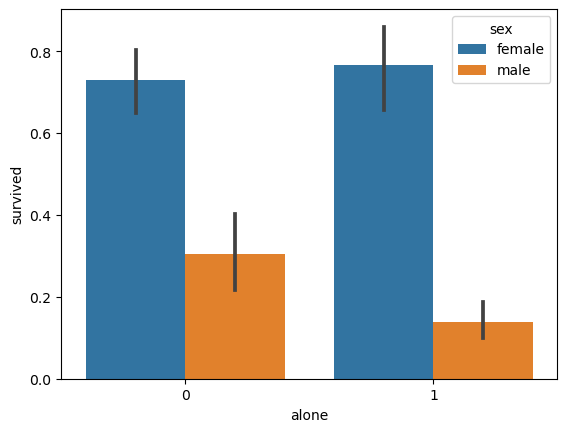

In [59]:
female = train[train.sex == 'female']
male = train[train.sex == 'male']

sns.barplot(x = 'alone', y = 'survived', data = train, hue = 'sex')
plt.show()

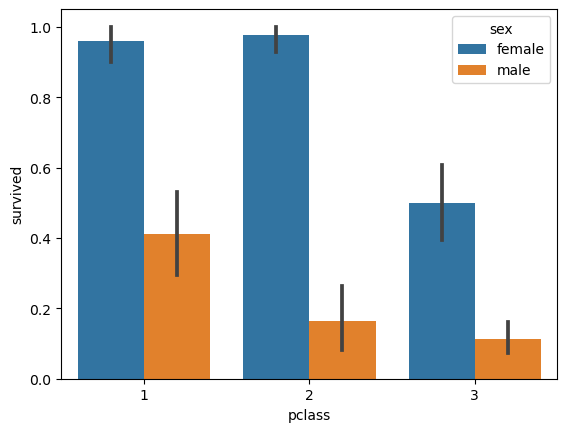

In [62]:
sns.barplot(x='pclass', y= 'survived', data = train, hue = 'sex')
plt.show()

# female who didnt survive appear to be in 3rd class
# if a male survived, he was likely in 1st class

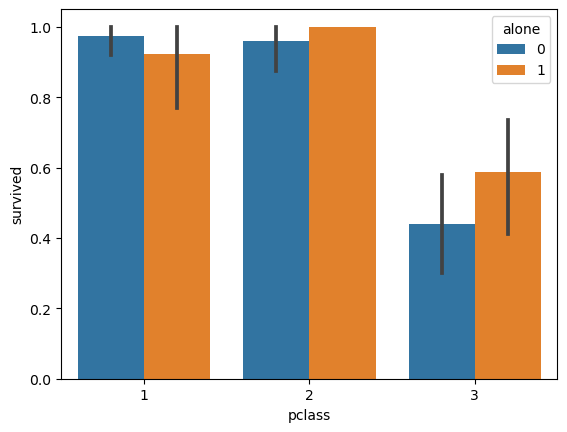

In [66]:
sns.barplot(x = 'pclass', y ='survived', data= train[train.sex == 'female'],
           hue = 'alone')
plt.show()

run a test if females in 3rd class who travel alone are
significantly more likel to survive than those not traveling alone

H_0: survival rate of females in 3rd class alone <= survival rate of females in 3rd class not alone

H_a: survival rate of females in 3rd class alone > survival rate of females in 3rd class not alone

In [68]:
sample = train[(train['pclass'] == 3) & (train['sex'] == 'female')]
                
ovserved = pd.crosstabe(sample.alone, sample.survived)
chi2, p, df, expected = stats.chi2_contingency

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1104995647.py, line 1)

- Document any and all findings and takeaways in your notebook using markdown.

# Part III

- Explore your telco data to discover drivers of churn

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco = prepare.prep_telco_data(telco)
telco

UnboundLocalError: local variable 'split_data' referenced before assignment

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

In [56]:
cat_var = []
bin_cats = []
mult_cats = []
num_vars = []
for col in telco.columns:
    if telco[col].dtype == 'object':
        cat_var.append(col)
        if telco[col].value_counts().size > 2:
            mult_cats.append(col)
        else:
            bin_cats.append(col)
    else:
        numerical_columns.append(col)

- Determine if it would be valuable to combine multiple columns into one.

In [88]:
sample2 = telco[telco.churn == 'Yes'].monthly_charges.mean()
sample2

74.44133226324232

In [ ]:
sample = telco[telco.churn == 'Yes'].monthly_charges
overall_mean = telco.monthly_charges.mean()

In [86]:
t, p = stats.ttest_1samp(sample, overall_mean)
print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.5


- What are your drivers of churn?

- Does it make sense to combine any features?

- Do you find any surprises?

- Document any and all findings and takeaways in your notebook using markdown.